In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('glass.csv')
df.drop('1',axis=1,inplace=True)


In [3]:
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [4]:
df.columns=["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"]

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [6]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
208,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [8]:
df.shape

(213, 10)

In [9]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


<AxesSubplot:>

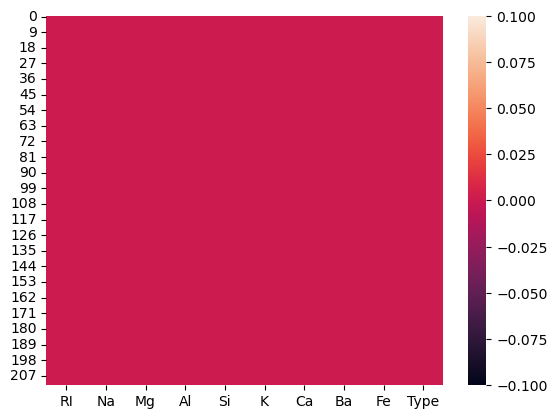

In [11]:
#visualize null value using heatmap
sns.heatmap(df.isnull())

No null value is present.

In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


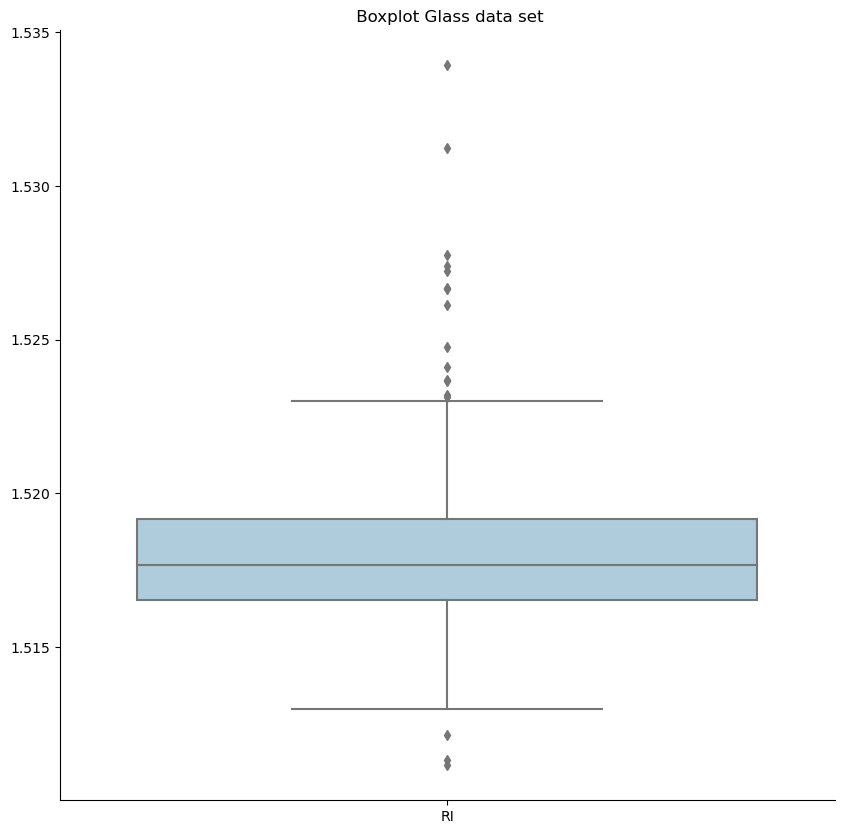

In [13]:
columns_to_plot = ["RI"]

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df[columns_to_plot], palette='Paired', ax=ax)
sns.despine()
plt.title(' Boxplot Glass data set')
plt.show()

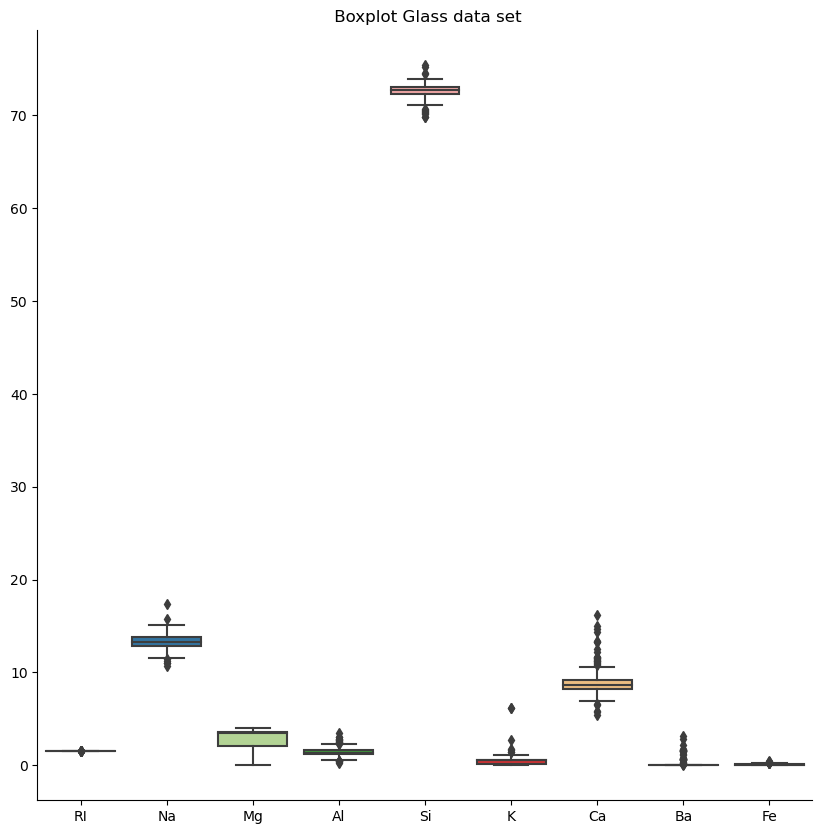

In [14]:
columns_to_plot = ['RI',"Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df[columns_to_plot], palette='Paired', ax=ax)
sns.despine()
plt.title(' Boxplot Glass data set')
plt.show()

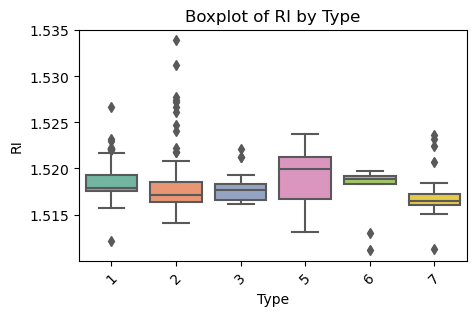

In [15]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='RI', data=df, palette='Set2')
plt.title('Boxplot of RI by Type')
plt.xticks(rotation=45) 
plt.show()


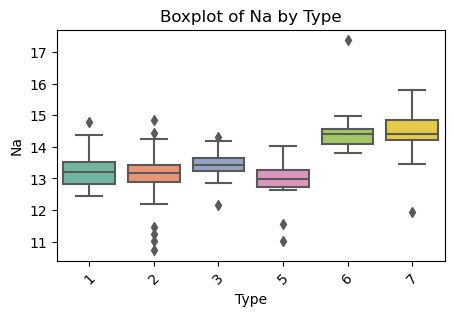

In [16]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Na', data=df, palette='Set2')
plt.title('Boxplot of Na by Type')
plt.xticks(rotation=45) 
plt.show()

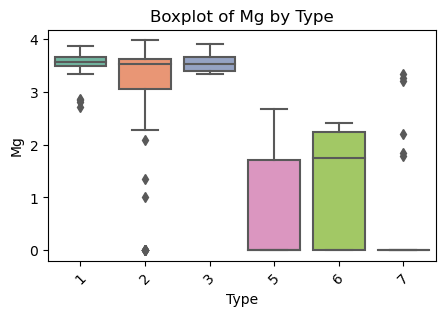

In [17]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Mg', data=df, palette='Set2')
plt.title('Boxplot of Mg by Type')
plt.xticks(rotation=45) 
plt.show()

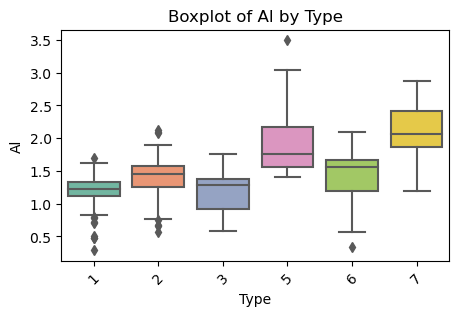

In [18]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Al', data=df, palette='Set2')
plt.title('Boxplot of Al by Type')
plt.xticks(rotation=45) 
plt.show()

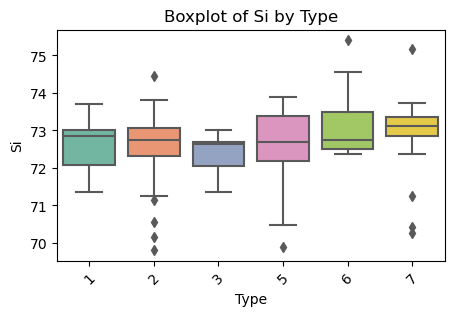

In [19]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Si', data=df, palette='Set2')
plt.title('Boxplot of Si by Type')
plt.xticks(rotation=45) 
plt.show()

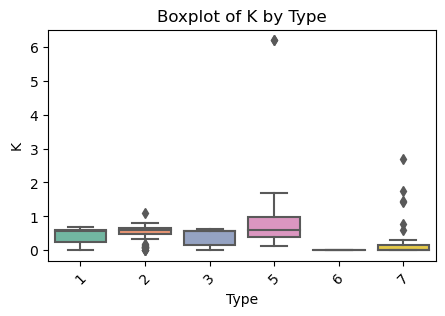

In [20]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='K', data=df, palette='Set2')
plt.title('Boxplot of K by Type')
plt.xticks(rotation=45) 
plt.show()

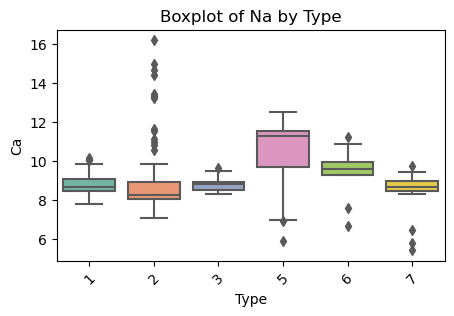

In [21]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Ca', data=df, palette='Set2')
plt.title('Boxplot of Na by Type')
plt.xticks(rotation=45) 
plt.show()

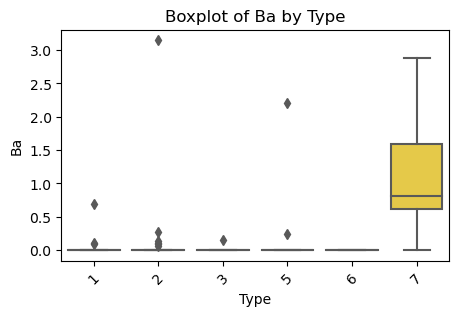

In [22]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Ba', data=df, palette='Set2')
plt.title('Boxplot of Ba by Type')
plt.xticks(rotation=45) 
plt.show()

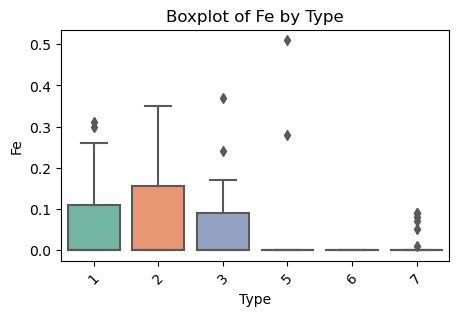

In [23]:
plt.figure(figsize=(5, 3))
sns.boxplot(x='Type', y='Fe', data=df, palette='Set2')
plt.title('Boxplot of Fe by Type')
plt.xticks(rotation=45) 
plt.show()

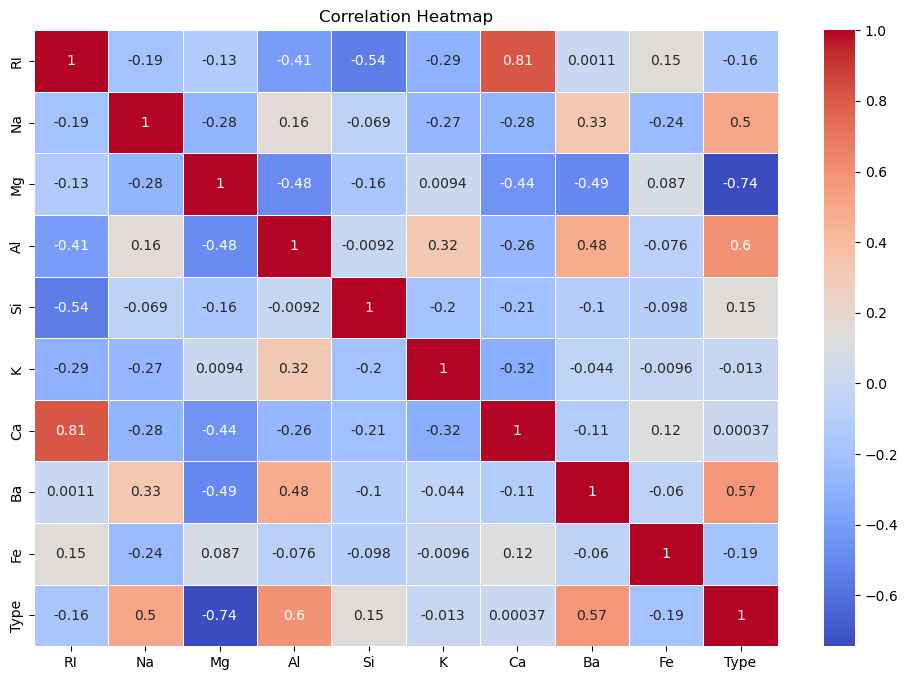

In [24]:
# Assuming 'df' is your DataFrame containing numerical data
corr_matrix = df.corr()  # Calculate the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Count of Glass Types')

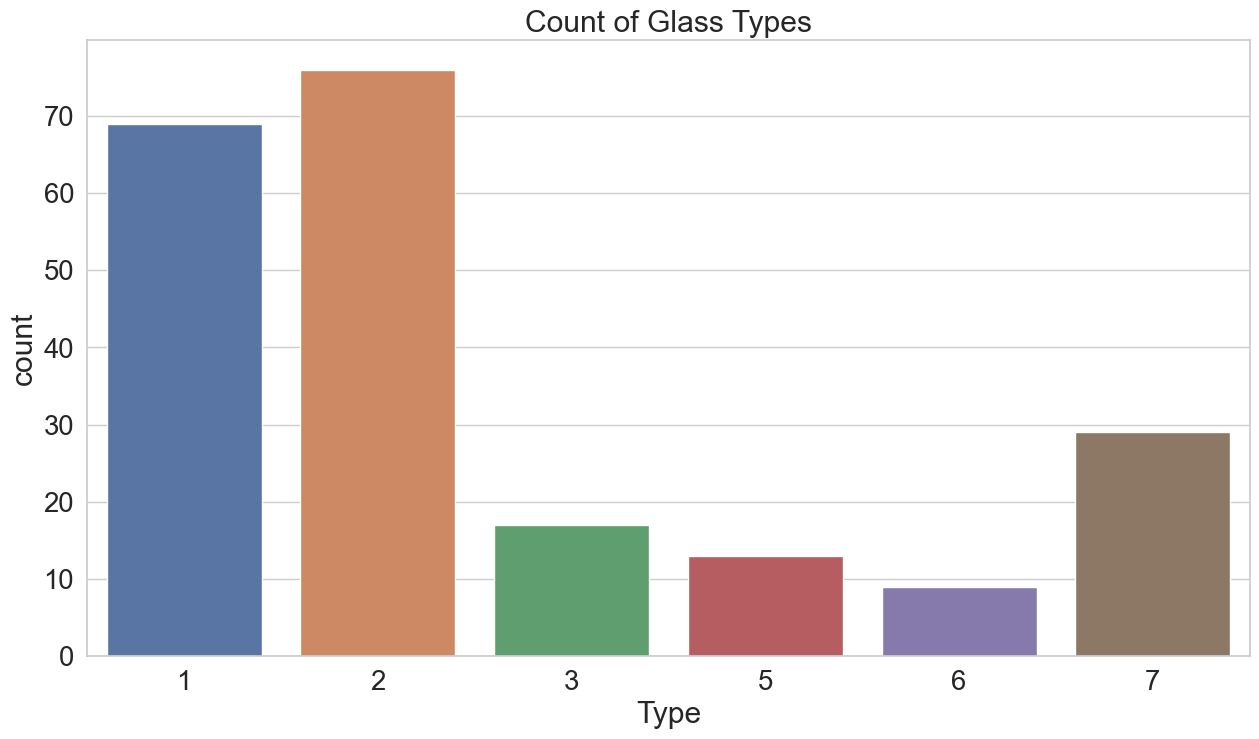

In [25]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=df).set_title('Count of Glass Types')

In [26]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# remove outlier

In [27]:
df=df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [28]:
len(df)

193

                     PC1   PC2   PC3   PC4   PC5   PC6   PC7  PC8  PC9
Explained_Variance  2.93  2.58  1.23  0.93  0.63  0.42  0.22  0.1  0.0


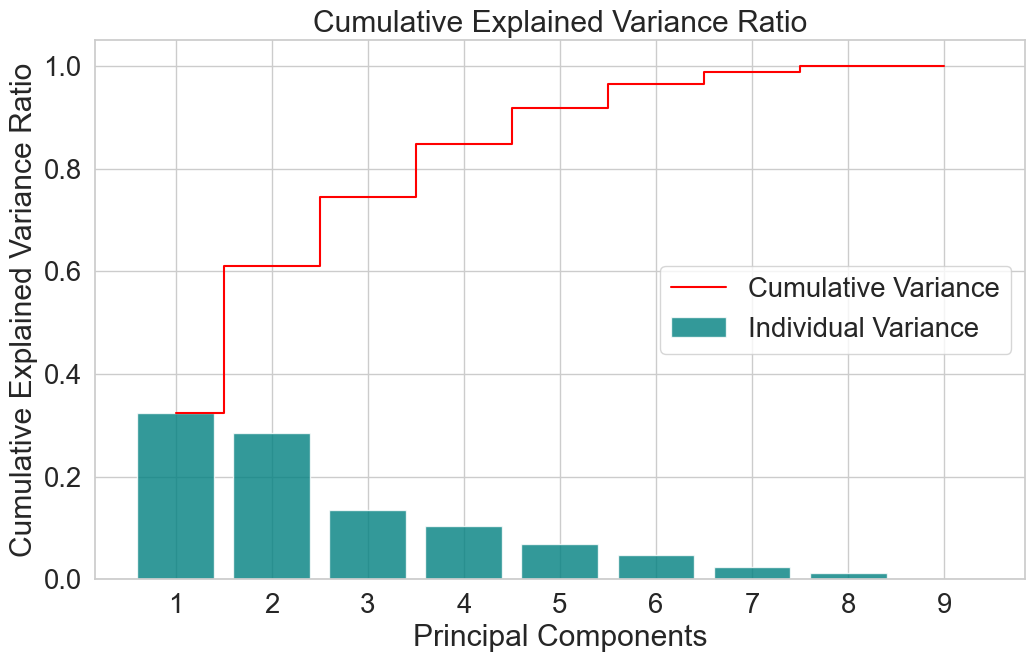

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have a DataFrame 'glass_df' with the data
X_var = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]

# Standardize the feature matrix (mean=0, std=1)
scaler = StandardScaler()
X_std = scaler.fit_transform(X_var)

# Create a PCA object
pca = PCA(random_state=1)

# Fit PCA on the standardized data
pca.fit(X_std)

# Calculate explained variance ratio and cumulative explained variance
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

# Create a DataFrame to display explained variance for each principal component
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["PC" + str(i+1) for i in range(len(var_exp))], columns=["Explained_Variance"])

# Print the explained variance for each principal component
print(var_df.T)

# Visualize the explained variance ratio and cumulative explained variance
plt.figure(figsize=(12, 7))

# Plot the explained variance ratio for each principal component
plt.bar(range(1, len(var_exp) + 1), var_exp, align='center', label='Individual Variance', color='teal', alpha=0.8)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.xticks(np.arange(1, len(var_exp) + 1, 1))

# Plot the cumulative explained variance
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='Cumulative Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')

plt.legend(loc='center right')
plt.show()

# Model Selection

In [30]:
X = df.drop('Type', axis=1) 
Y = df['Type']


In [31]:
X.shape

(193, 9)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
X_train.shape

(154, 9)

In [34]:

X_test.shape


(39, 9)

In [35]:
y_train.shape


(154,)

In [36]:

y_test.shape

(39,)

# Model Test

In [37]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train, y_train)
y_pred_svm = svmMod.predict(X_test)
sc_svm = metrics.accuracy_score(y_pred_svm, y_test)

# Print the accuracy score for SVM
print("Accuracy for SVM:", sc_svm)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.05, random_state=1)
gbmMod.fit(X_train, y_train)
y_pred_gbm = gbmMod.predict(X_test)
sc_gbm = metrics.accuracy_score(y_pred_gbm, y_test)

# Print the accuracy score for Gradient Boosting
print("Accuracy for Gradient Boosting:", sc_gbm)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred_tree = DecTree.predict(X_test)
sc_tree = metrics.accuracy_score(y_pred_tree, y_test)

# Print the accuracy score for Decision Tree
print("Accuracy for Decision Tree:", sc_tree)

# Random Forest
RandFor = RandomForestClassifier(max_depth=3, min_samples_split=2, n_estimators=50, random_state=1)
RandFor.fit(X_train, y_train)
y_pred_rf = RandFor.predict(X_test)
sc_rf = metrics.accuracy_score(y_pred_rf, y_test)

# Print the accuracy score for Random Forest
print("Accuracy for Random Forest:", sc_rf)


Accuracy for SVM: 0.3333333333333333
Accuracy for Gradient Boosting: 0.7692307692307693
Accuracy for Decision Tree: 0.5641025641025641
Accuracy for Random Forest: 0.6410256410256411


# Hyperparameter tuning

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
tuned_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters set found on development set:")
print()
print(grid.best_params_)


Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [39]:
# Create the best model using the best hyperparameters
model = grid.best_estimator_

# Fit the best model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_pred, y_test)

# Print the accuracy score
print("Accuracy on the test data:", accuracy)


Accuracy on the test data: 0.5641025641025641


In [41]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10],
                     'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [42]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.7435897435897436

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
tuned_parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for Random Forest
grid = GridSearchCV(RandomForestClassifier(random_state=1), tuned_parameters, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters set found on development set:")
print()
print(grid.best_params_)


Best parameters set found on development set:

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [44]:
# Create the best model using the best hyperparameters
model = grid.best_estimator_

# Fit the best model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_pred, y_test)

# Print the accuracy score
print("Accuracy on the test data:", accuracy)


Accuracy on the test data: 0.7948717948717948


In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting
tuned_parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object for Gradient Boosting
grid = GridSearchCV(GradientBoostingClassifier(random_state=1), tuned_parameters, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters set found on development set:")
print()
print(grid.best_params_)


Best parameters set found on development set:

{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
# Create the best model using the best hyperparameters
model = grid.best_estimator_

# Fit the best model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_pred, y_test)

# Print the accuracy score
print("Accuracy on the test data:", accuracy)


Accuracy on the test data: 0.8205128205128205


hese results indicate that hyperparameter tuning has led to improved accuracy for all three models. Among them, the Gradient Boosting model has the highest accuracy on the test data, suggesting that it may be the best-performing model for your specific task.

Text(262.25, 0.5, 'predicted label')

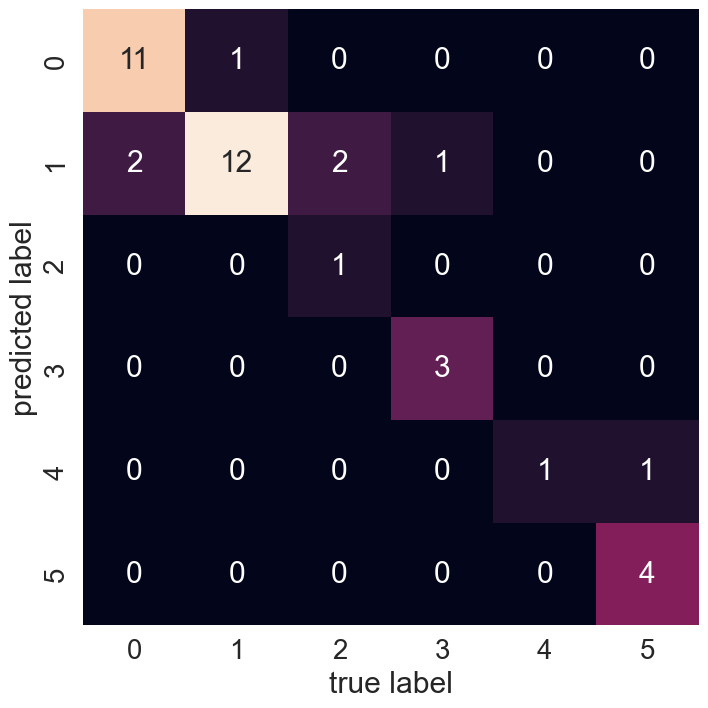

In [51]:
# Let's plot the confusion matrix for performance of model
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(12,8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.85      0.88        13
           2       0.71      0.92      0.80        13
           3       1.00      0.33      0.50         3
           5       1.00      0.75      0.86         4
           6       0.50      1.00      0.67         1
           7       1.00      0.80      0.89         5

    accuracy                           0.82        39
   macro avg       0.85      0.78      0.77        39
weighted avg       0.86      0.82      0.82        39



This classification report provides a comprehensive evaluation of your multi-class classification model's performance for each class and its overall performance. It appears that the model performs well for some classes (e.g., Class 1, Class 2, Class 5, Class 7) but has lower performance for others (e.g., Class 3). Depending on your specific goals and the importance of each class, you can fine-tune your model or make adjustments as needed to improve its performance for specific classes.